In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [2]:
df_train = pd.read_excel('parkinsons.train.xlsx')
df_test = pd.read_excel('parkinsons.test.xlsx')

In [3]:
train = df_train
test = df_test

In [4]:
train.shape

(117, 23)

In [5]:
test.shape

(78, 23)

In [6]:
train.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,...,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000
mean,154.447179,202.887137,116.299051,0.006561,0.000046,0.003495,0.003608,0.010488,0.029576,0.283889,...,0.046654,0.027019,22.014641,0.752137,0.491363,0.720016,-5.662982,0.228720,2.391296,0.207181
std,40.990923,99.893760,43.182446,0.005323,0.000039,0.003305,0.002952,0.009915,0.019824,0.205919,...,0.032096,0.047194,4.415198,0.433629,0.106070,0.056755,1.129683,0.088847,0.372898,0.092145
min,88.333000,102.305000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009580,0.085000,...,0.014030,0.000650,8.441000,0.000000,0.256570,0.582710,-7.964984,0.018689,1.423287,0.044539
25%,117.963000,138.052000,84.072000,0.003690,0.000030,0.001690,0.001970,0.005070,0.016600,0.152000,...,0.024360,0.006090,19.493000,1.000000,0.415564,0.673636,-6.482096,0.172270,2.103106,0.133867
50%,149.818000,185.604000,100.757000,0.005020,0.000030,0.002600,0.002750,0.007800,0.022930,0.216000,...,0.037940,0.011700,22.431000,1.000000,0.486738,0.724045,-5.724056,0.220434,2.398422,0.192730
75%,182.018000,224.429000,142.822000,0.007330,0.000060,0.003800,0.003960,0.011400,0.036580,0.361000,...,0.054390,0.025990,24.971000,1.000000,0.585169,0.762959,-4.913885,0.281618,2.640798,0.260375
max,260.105000,592.030000,237.303000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [7]:
import seaborn
import matplotlib.pyplot as plt

def plot_df(df, name):
  corr = df[df.columns].corr()
  mask = np.zeros_like(corr, dtype=np.bool)
  mask[np.triu_indices_from(mask)] = True
  plt.figure(figsize=(20, 15))
  seaborn.set(font_scale=1.2)
  seaborn.heatmap(corr, mask=mask, center=0, annot=True,
    square=True, linewidths=3, alpha=0.7)
  plt.title(name)

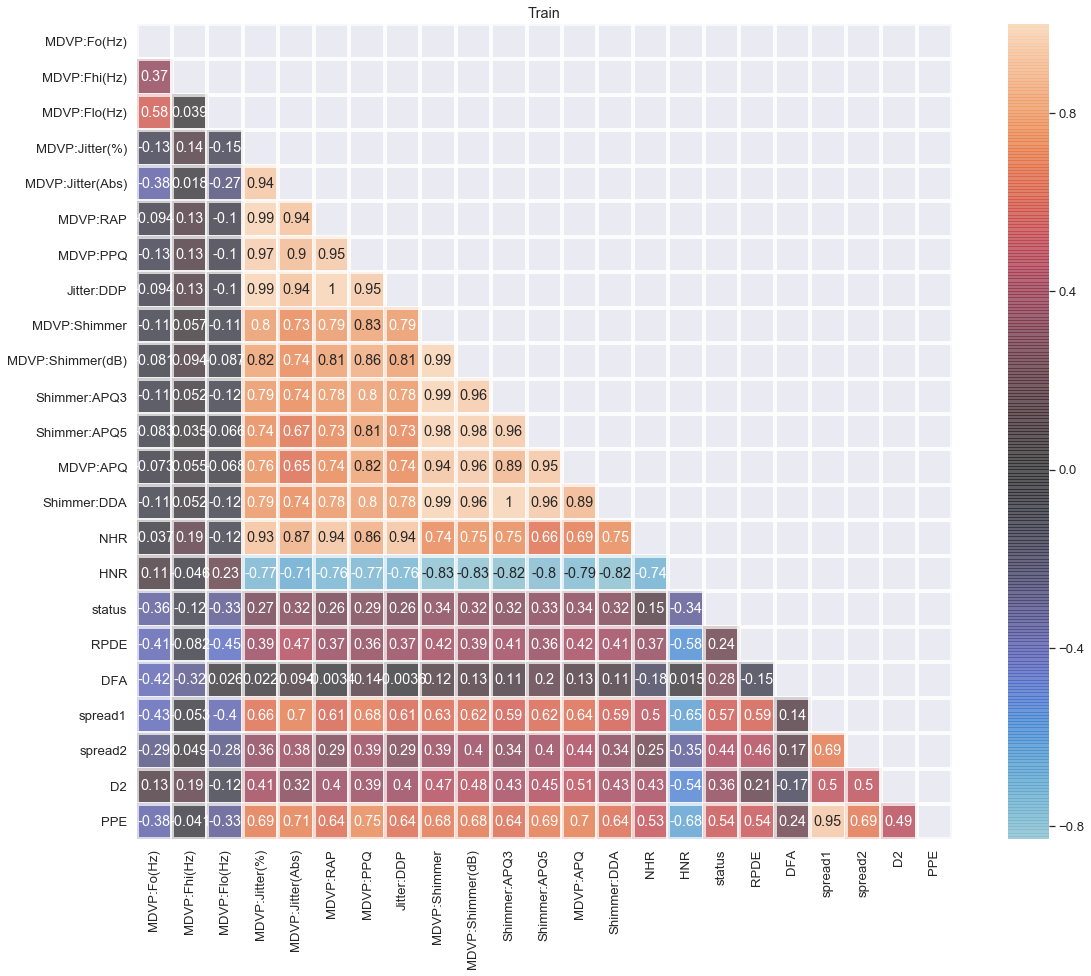

In [8]:
plot_df(train, 'Train')

In [9]:
print(train.columns)

Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')


In [10]:
class_name = input("Chooese the class: ")

Chooese the class: status


In [11]:
minmax_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

In [12]:
tr_ans = train[class_name]
ts_ans = test[class_name]
class_count = len(tr_ans.unique())
print(class_count)

2


In [13]:
tr_data = train.drop([class_name], axis=1)
ts_data = test.drop([class_name], axis=1)

In [14]:
# #결측치 채우기 if 결측치가 0일 경우

# from sklearn.impute import SimpleImputer

# rep_0 = SimpleImputer(missing_values=0, strategy="mean")

# tr_data = rep_0.fit_transform(tr_data)
# ts_data = rep_0.fit_transform(ts_data)

In [15]:
std_tr_data = standard_scaler.fit_transform(tr_data)
std_ts_data = standard_scaler.transform(ts_data)
mm_tr_data = minmax_scaler.fit_transform(tr_data)
mm_ts_data = minmax_scaler.transform(ts_data)
tr_ans = np.array(tr_ans)
ts_ans = np.array(ts_ans)

In [16]:
tr_ans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [17]:
import tensorflow as tf
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout
from sklearn import metrics
from tensorflow.keras.regularizers import l2


ImportError: Traceback (most recent call last):
  File "C:\Users\ai\Anaconda3\lib\site-packages\tensorflow\python\pywrap_tensorflow.py", line 58, in <module>
    from tensorflow.python.pywrap_tensorflow_internal import *
  File "C:\Users\ai\Anaconda3\lib\site-packages\tensorflow\python\pywrap_tensorflow_internal.py", line 28, in <module>
    _pywrap_tensorflow_internal = swig_import_helper()
  File "C:\Users\ai\Anaconda3\lib\site-packages\tensorflow\python\pywrap_tensorflow_internal.py", line 24, in swig_import_helper
    _mod = imp.load_module('_pywrap_tensorflow_internal', fp, pathname, description)
  File "C:\Users\ai\Anaconda3\lib\imp.py", line 242, in load_module
    return load_dynamic(name, filename, file)
  File "C:\Users\ai\Anaconda3\lib\imp.py", line 342, in load_dynamic
    return _load(spec)
ImportError: DLL load failed with error code -1073741795


Failed to load the native TensorFlow runtime.

See https://www.tensorflow.org/install/errors

for some common reasons and solutions.  Include the entire stack trace
above this error message when asking for help.

In [18]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix

In [19]:
# real Version


def create_model(hidden_layers = 1, neurons =1, init_mode = 'uniform', 
                 activation = 'elu', kernel_regularizer=l2(0.001)):
  model = Sequential()
  model.add(Dense(neurons, input_dim=len(mm_tr_data.T), kernel_initializer=init_mode, activation=activation))
  for i in range(hidden_layers):
    
    model.add(Dense(neurons, kernel_initializer=init_mode, kernel_regularizer=kernel_regularizer))
    model.add(BatchNormalization())
    model.add(Activation(activation))
    model.add(Dropout(0.2))
  
  if class_count == 2:  
    model.add(Dense(1,activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  elif class_count != 2:
    model.add(Dense(class_count, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['sparse_categorical_accuracy'])
  return model

In [20]:
keras_model = KerasClassifier(build_fn=create_model, epochs=64, batch_size=16)

In [21]:
leaky_relu = tf.nn.leaky_relu
hidden_layers = [4,8,12]
neurons = [32, 64, 128]
activation = ['elu', leaky_relu]
init_mode = ['glorot_uniform', 'he_normal']

In [22]:
param_grid = dict(hidden_layers = hidden_layers, neurons = neurons, init_mode = init_mode, activation = activation)
minmax_grid = GridSearchCV(estimator=keras_model, param_grid=param_grid, n_jobs= -1, cv=3)
std_grid = GridSearchCV(estimator=keras_model, param_grid=param_grid, n_jobs= -1, cv=3)

In [23]:
import warnings
warnings.filterwarnings("ignore")

In [24]:
minmax_grid_result = minmax_grid.fit(mm_tr_data, tr_ans)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Epoch 1/64
117/117 [==============================] - 2s 18ms/sample - loss: 1.9574 - acc: 0.5299
Epoch 2/64
117/117 [==============================] - 0s 403us/sample - loss: 1.7429 - acc: 0.6581
Epoch 3/64
117/117 [==============================] - 0s 360us/sample - loss: 1.6021 - acc: 0.7265
Epoch 4/64
117/117 [==============================] - 0s 386us/sample - loss: 1.5522 - acc: 0.6752
Epoch 5/64
117/117 [==============================] - 0s 411us/sample - loss: 1.5702 - acc: 0.7692
Epoch 6/64
117/117 [==============================] - 0s 360us/sample - loss: 1.5300 - acc: 0.7692
Epoch 7/64
117/117 [==============================] - 0s 377us/sample - loss: 1.4095 - acc: 0.8120
Epoch 8/64
117/117 [==============================] - 0s 360us/sample - l

In [25]:
std_grid_result = std_grid.fit(std_tr_data, tr_ans)

Epoch 1/64
117/117 [==============================] - 2s 19ms/sample - loss: 1.1698 - acc: 0.6325
Epoch 2/64
117/117 [==============================] - 0s 266us/sample - loss: 1.0890 - acc: 0.6581
Epoch 3/64
117/117 [==============================] - 0s 274us/sample - loss: 1.1491 - acc: 0.6923
Epoch 4/64
117/117 [==============================] - 0s 274us/sample - loss: 1.0164 - acc: 0.7692
Epoch 5/64
117/117 [==============================] - 0s 274us/sample - loss: 1.0608 - acc: 0.7179
Epoch 6/64
117/117 [==============================] - 0s 283us/sample - loss: 1.0912 - acc: 0.6838
Epoch 7/64
117/117 [==============================] - 0s 283us/sample - loss: 1.0189 - acc: 0.7265
Epoch 8/64
117/117 [==============================] - 0s 274us/sample - loss: 0.9653 - acc: 0.7521
Epoch 9/64
117/117 [==============================] - 0s 283us/sample - loss: 1.0284 - acc: 0.7265
Epoch 10/64
117/117 [==============================] - 0s 283us/sample - loss: 0.9544 - acc: 0.7778
Epoch 11/6

In [ ]:
print("Scaler = minmax")
print("Best: %f using %s" % (minmax_grid_result.best_score_, minmax_grid_result.best_params_))
means = minmax_grid_result.cv_results_['mean_test_score']
stds = minmax_grid_result.cv_results_['std_test_score']
params = minmax_grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Scaler = minmax
Best: 0.829060 using {'activation': 'elu', 'hidden_layers': 8, 'init_mode': 'glorot_uniform', 'neurons': 128}
0.760684 (0.063960) with: {'activation': 'elu', 'hidden_layers': 4, 'init_mode': 'glorot_uniform', 'neurons': 32}
0.786325 (0.098939) with: {'activation': 'elu', 'hidden_layers': 4, 'init_mode': 'glorot_uniform', 'neurons': 64}
0.726496 (0.043581) with: {'activation': 'elu', 'hidden_layers': 4, 'init_mode': 'glorot_uniform', 'neurons': 128}
0.769231 (0.041872) with: {'activation': 'elu', 'hidden_layers': 4, 'init_mode': 'he_normal', 'neurons': 32}
0.794872 (0.062807) with: {'activation': 'elu', 'hidden_layers': 4, 'init_mode': 'he_normal', 'neurons': 64}
0.743590 (0.062807) with: {'activation': 'elu', 'hidden_layers': 4, 'init_mode': 'he_normal', 'neurons': 128}
0.803419 (0.031980) with: {'activation': 'elu', 'hidden_layers': 8, 'init_mode': 'glorot_uniform', 'neurons': 32}
0.786325 (0.115305) with: {'activation': 'elu', 'hidden_layers': 8, 'init_mode': 'glorot_

In [27]:
print("Scaler = standard")
print("Best: %f using %s" % (std_grid_result.best_score_, std_grid_result.best_params_))
means = std_grid_result.cv_results_['mean_test_score']
stds = std_grid_result.cv_results_['std_test_score']
params = std_grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Scaler = standard
Best: 0.803419 using {'activation': 'elu', 'hidden_layers': 8, 'init_mode': 'glorot_uniform', 'neurons': 64}
0.743590 (0.055391) with: {'activation': 'elu', 'hidden_layers': 4, 'init_mode': 'glorot_uniform', 'neurons': 32}
0.786325 (0.073524) with: {'activation': 'elu', 'hidden_layers': 4, 'init_mode': 'glorot_uniform', 'neurons': 64}
0.760684 (0.048349) with: {'activation': 'elu', 'hidden_layers': 4, 'init_mode': 'glorot_uniform', 'neurons': 128}
0.700855 (0.048349) with: {'activation': 'elu', 'hidden_layers': 4, 'init_mode': 'he_normal', 'neurons': 32}
0.786325 (0.073524) with: {'activation': 'elu', 'hidden_layers': 4, 'init_mode': 'he_normal', 'neurons': 64}
0.709402 (0.043581) with: {'activation': 'elu', 'hidden_layers': 4, 'init_mode': 'he_normal', 'neurons': 128}
0.769231 (0.020936) with: {'activation': 'elu', 'hidden_layers': 8, 'init_mode': 'glorot_uniform', 'neurons': 32}
0.803419 (0.031980) with: {'activation': 'elu', 'hidden_layers': 8, 'init_mode': 'glorot

In [28]:
pred = minmax_grid.predict(mm_ts_data)

accuracy = accuracy_score(pred, ts_ans)
ts_ans = ts_ans.astype(float)
precision, recall, fbeta_score, support = precision_recall_fscore_support(ts_ans, pred)
conf_mat = confusion_matrix(ts_ans, pred)
print("Accuracy = ", accuracy)
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(ts_ans, pred)))
print("")
print("Classification Report")
print(metrics.classification_report(ts_ans, pred))

Accuracy =  0.8717948717948718
Confusion Matrix
[[18  1]
 [ 9 50]]

Classification Report
              precision    recall  f1-score   support

         0.0       0.67      0.95      0.78        19
         1.0       0.98      0.85      0.91        59

    accuracy                           0.87        78
   macro avg       0.82      0.90      0.85        78
weighted avg       0.90      0.87      0.88        78



In [29]:
pred = std_grid.predict(std_ts_data)

accuracy = accuracy_score(pred, ts_ans)
ts_ans = ts_ans.astype(float)
precision, recall, fbeta_score, support = precision_recall_fscore_support(ts_ans, pred)
conf_mat = confusion_matrix(ts_ans, pred)
print("Accuracy = ", accuracy)
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(ts_ans, pred)))
print("")
print("Classification Report")
print(metrics.classification_report(ts_ans, pred))

Accuracy =  0.8333333333333334
Confusion Matrix
[[17  2]
 [11 48]]

Classification Report
              precision    recall  f1-score   support

         0.0       0.61      0.89      0.72        19
         1.0       0.96      0.81      0.88        59

    accuracy                           0.83        78
   macro avg       0.78      0.85      0.80        78
weighted avg       0.87      0.83      0.84        78



In [30]:
# # testbed Version


# def create_model(hidden_layers = 1, neurons =1, init_mode = 'uniform', activation = 'elu'):
#     model = Sequential()
#     model.add(Dense(neurons, input_dim=len(tr_data.T), kernel_initializer=init_mode, activation=activation))

#     for i in range(hidden_layers):
        
#         model.add(Dense(neurons, kernel_initializer=init_mode))
#         model.add(BatchNormalization())
#         model.add(Activation(activation))
#         model.add(Dropout(0.2))
  
#     if class_count == 2:  
#         model.add(Dense(1,activation='sigmoid'))
#         model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#     elif class_count != 2:
#         model.add(Dense(class_count-1, activation='softmax'))
#         model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#     return model


# hidden_layers = [5, 10]
# neurons = [32, 64]
# activation = ['elu']
# init_mode = ['he_uniform']

# keras_model = KerasClassifier(build_fn=create_model, epochs=4, batch_size=4)

# param_grid = dict(hidden_layers = hidden_layers, neurons = neurons, init_mode = init_mode, activation = activation)
# grid = GridSearchCV(estimator=keras_model, param_grid=param_grid, n_jobs= -1, cv=2)